## Data analyser

In [2]:
import numpy as np
import seaborn
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# ResNet18

## ResNet18 hyperparameter search results

In [22]:
# Split 1
df_1_lr_0_1 = pd.read_csv('output/resnet18/split_1/progress/train_progress_lr_0_1.csv')
df_1_lr_0_01 = pd.read_csv('output/resnet18/split_1/progress/train_progress_lr_0_01.csv')
df_1_lr_0_05 = pd.read_csv('output/resnet18/split_1/progress/train_progress_lr_0_05.csv')
# Split 2
df_2_lr_0_1 = pd.read_csv('output/resnet18/split_2/progress/train_progress_lr_0_1.csv')
df_2_lr_0_01 = pd.read_csv('output/resnet18/split_2/progress/train_progress_lr_0_01.csv')
df_2_lr_0_05 = pd.read_csv('output/resnet18/split_2/progress/train_progress_lr_0_05.csv')
# Split 3
df_3_lr_0_1 = pd.read_csv('output/resnet18/split_3/progress/train_progress_lr_0_1.csv')
df_3_lr_0_01 = pd.read_csv('output/resnet18/split_3/progress/train_progress_lr_0_01.csv')
df_3_lr_0_05 = pd.read_csv('output/resnet18/split_3/progress/train_progress_lr_0_05.csv')

In [23]:
dfs_lr_0_1 = [df_1_lr_0_1, df_2_lr_0_1, df_3_lr_0_1]
dfs_lr_0_01 = [df_1_lr_0_01, df_2_lr_0_01, df_3_lr_0_01]
dfs_lr_0_05 = [df_1_lr_0_05, df_2_lr_0_05, df_3_lr_0_05]

In [24]:
df_1_lr_0_1.head(5)

,train_loss,train_acc,val_loss,val_acc,best_acc,runtime(s)
0,2.096697,0.779675,0.336920,0.970516,0.990172,3119.304377
1,1.239239,0.894962,0.323431,0.975430,0.990172,3119.304377
2,1.546850,0.883860,0.222729,0.977887,0.990172,3119.304377
3,1.099223,0.911187,0.673639,0.958231,0.990172,3119.304377
4,0.804725,0.920581,0.482778,0.975430,0.990172,3119.304377


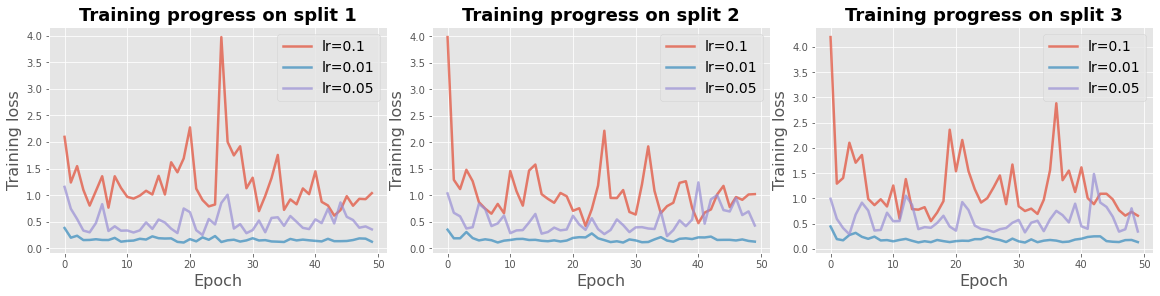

In [25]:
x_values = np.arange(df_1_lr_0_1.shape[0])
fig, axes = plt.subplots(1,3,figsize=(16,4))
for split in range(3):
    axes[split].set_title(f"Training progress on split {split+1}", size=18, fontweight="bold")
    axes[split].plot(x_values, dfs_lr_0_1[split].train_loss, "-", alpha=0.7, label="lr=0.1", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_01[split].train_loss, "-", alpha=0.7, label="lr=0.01", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_05[split].train_loss, "-", alpha=0.7, label="lr=0.05", linewidth=2.5)
    axes[split].legend(loc="best", fontsize=14)
    axes[split].set_xlabel("Epoch", fontsize=16)
    axes[split].set_ylabel("Training loss", fontsize=16)
    plt.tight_layout(pad=0.3)
plt.show()

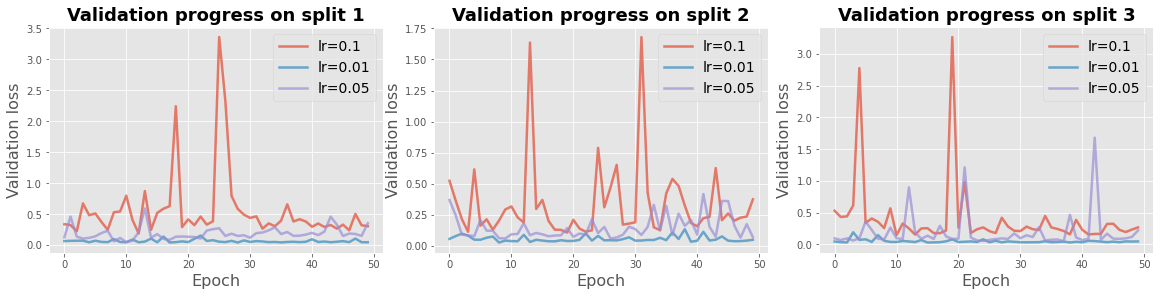

In [26]:
x_values = np.arange(df_1_lr_0_1.shape[0])
fig, axes = plt.subplots(1,3,figsize=(16,4))
for split in range(3):
    axes[split].set_title(f"Validation progress on split {split+1}", size=18, fontweight="bold")
    axes[split].plot(x_values, dfs_lr_0_1[split].val_loss, "-", alpha=0.7, label="lr=0.1", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_01[split].val_loss, "-", alpha=0.7, label="lr=0.01", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_05[split].val_loss, "-", alpha=0.7, label="lr=0.05", linewidth=2.5)
    axes[split].legend(loc="best", fontsize=14)
    axes[split].set_xlabel("Epoch", fontsize=16)
    axes[split].set_ylabel("Validation loss", fontsize=16)
    plt.tight_layout(pad=0.3)
plt.show()

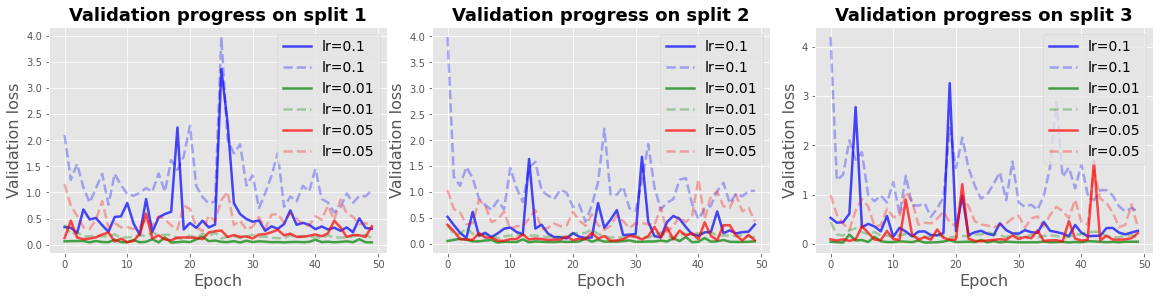

In [47]:
colours = ['blue', 'green', 'red']
x_values = np.arange(df_1_lr_0_1.shape[0])
fig, axes = plt.subplots(1,3,figsize=(16,4))
for split in range(3):
    axes[split].set_title(f"Validation progress on split {split+1}", size=18, fontweight="bold")
    axes[split].plot(x_values, dfs_lr_0_1[split].val_loss, "-", alpha=0.7, color="blue", label="lr=0.1", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_1[split].train_loss, "--", alpha=0.3, color="blue", label="lr=0.1", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_01[split].val_loss, "-", alpha=0.7, color="green", label="lr=0.01", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_01[split].train_loss, "--", alpha=0.3, color="green", label="lr=0.01", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_05[split].val_loss, "-", alpha=0.7, color="red", label="lr=0.05", linewidth=2.5)
    axes[split].plot(x_values, dfs_lr_0_05[split].train_loss, "--", alpha=0.3, color="red", label="lr=0.05", linewidth=2.5)
    axes[split].legend(loc="best", fontsize=14)
    axes[split].set_xlabel("Epoch", fontsize=16)
    axes[split].set_ylabel("Validation loss", fontsize=16)
    plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/val_loss_each_split.png')
plt.show()


## Training Loss

In [27]:
lrs = [0.1, 0.01, 0.05]

means_train_loss = []
stds_train_loss = []

# lr=0.1
means_train_loss.append(np.array([dfs_lr_0_1[0].train_loss, 
                               dfs_lr_0_1[1].train_loss, 
                               dfs_lr_0_1[2].train_loss]).mean(axis=0))
stds_train_loss.append(np.array([dfs_lr_0_1[0].train_loss, 
                              dfs_lr_0_1[1].train_loss, 
                              dfs_lr_0_1[2].train_loss]).std(axis=0))
# lr=0.01
means_train_loss.append(np.array([dfs_lr_0_01[0].train_loss, 
                               dfs_lr_0_01[1].train_loss, 
                               dfs_lr_0_01[2].train_loss]).mean(axis=0))
stds_train_loss.append(np.array([dfs_lr_0_01[0].train_loss, 
                              dfs_lr_0_01[1].train_loss, 
                              dfs_lr_0_01[2].train_loss]).std(axis=0))
# lr=0.05
means_train_loss.append(np.array([dfs_lr_0_05[0].train_loss, 
                               dfs_lr_0_05[1].train_loss, 
                               dfs_lr_0_05[2].train_loss]).mean(axis=0))
stds_train_loss.append(np.array([dfs_lr_0_05[0].train_loss, 
                              dfs_lr_0_05[1].train_loss, 
                              dfs_lr_0_05[2].train_loss]).std(axis=0))

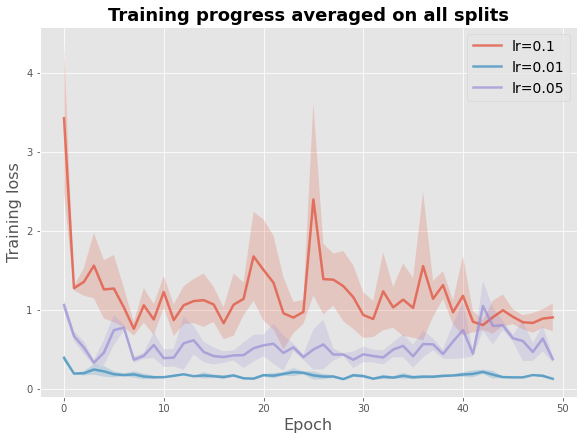

In [28]:
plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.title(f"Training progress averaged on all splits", size=18, fontweight="bold")
for split, lr in enumerate(lrs):
    plt.plot(x_values, means_train_loss[split], "-", alpha=0.7, label=f"lr={lr}", linewidth=2.5)
    plt.fill_between(
        x_values,
        means_train_loss[split] - stds_train_loss[split],
        means_train_loss[split] + stds_train_loss[split],
        alpha=0.2,
        antialiased=True,
    )

plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Training loss", fontsize=16)
plt.tight_layout(pad=0.3)
plt.show()

## Training Accuracy

In [29]:
lrs = [0.1, 0.01, 0.05]

means_train_acc = []
stds_train_acc = []

# lr=0.1
means_train_acc.append(np.array([dfs_lr_0_1[0].train_acc, 
                               dfs_lr_0_1[1].train_acc, 
                               dfs_lr_0_1[2].train_acc]).mean(axis=0))
stds_train_acc.append(np.array([dfs_lr_0_1[0].train_acc, 
                              dfs_lr_0_1[1].train_acc, 
                              dfs_lr_0_1[2].train_acc]).std(axis=0))
#lr=0.01
means_train_acc.append(np.array([dfs_lr_0_01[0].train_acc, 
                               dfs_lr_0_01[1].train_acc, 
                               dfs_lr_0_01[2].train_acc]).mean(axis=0))
stds_train_acc.append(np.array([dfs_lr_0_01[0].train_acc, 
                              dfs_lr_0_01[1].train_acc, 
                              dfs_lr_0_01[2].train_acc]).std(axis=0))
#lr=0.05
means_train_acc.append(np.array([dfs_lr_0_05[0].train_acc, 
                               dfs_lr_0_05[1].train_acc, 
                               dfs_lr_0_05[2].train_acc]).mean(axis=0))
stds_train_acc.append(np.array([dfs_lr_0_05[0].train_acc, 
                              dfs_lr_0_05[1].train_acc, 
                              dfs_lr_0_05[2].train_acc]).std(axis=0))

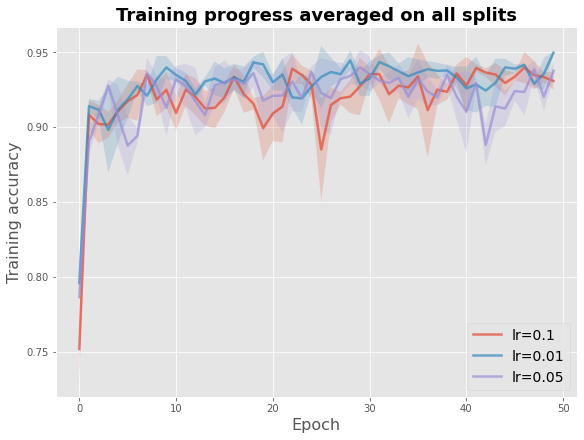

In [30]:
plt.figure(figsize=(8, 6))
axes = plt.gca()
plt.title(f"Training progress averaged on all splits", size=18, fontweight="bold")
for split, lr in enumerate(lrs):
    plt.plot(x_values, means_train_acc[split], "-", alpha=0.7, label=f"lr={lr}", linewidth=2.5)
    plt.fill_between(
        x_values,
        means_train_acc[split] - stds_train_acc[split],
        means_train_acc[split] + stds_train_acc[split],
        alpha=0.2,
        antialiased=True,
    )

plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Training accuracy", fontsize=16)
plt.tight_layout(pad=0.3)
plt.show()

## Validation Loss

In [31]:
lrs = [0.1, 0.01, 0.05]

means_val_loss = []
stds_val_loss = []

# lr=0.1
means_val_loss.append(np.array([dfs_lr_0_1[0].val_loss, 
                               dfs_lr_0_1[1].val_loss, 
                               dfs_lr_0_1[2].val_loss]).mean(axis=0))
stds_val_loss.append(np.array([dfs_lr_0_1[0].val_loss, 
                              dfs_lr_0_1[1].val_loss, 
                              dfs_lr_0_1[2].val_loss]).std(axis=0))
# lr=0.01
means_val_loss.append(np.array([dfs_lr_0_01[0].val_loss, 
                               dfs_lr_0_01[1].val_loss, 
                               dfs_lr_0_01[2].val_loss]).mean(axis=0))
stds_val_loss.append(np.array([dfs_lr_0_01[0].val_loss, 
                              dfs_lr_0_01[1].val_loss, 
                              dfs_lr_0_01[2].val_loss]).std(axis=0))
# lr=0.05
means_val_loss.append(np.array([dfs_lr_0_05[0].val_loss, 
                               dfs_lr_0_05[1].val_loss, 
                               dfs_lr_0_05[2].val_loss]).mean(axis=0))
stds_val_loss.append(np.array([dfs_lr_0_05[0].val_loss, 
                              dfs_lr_0_05[1].val_loss, 
                              dfs_lr_0_05[2].val_loss]).std(axis=0))

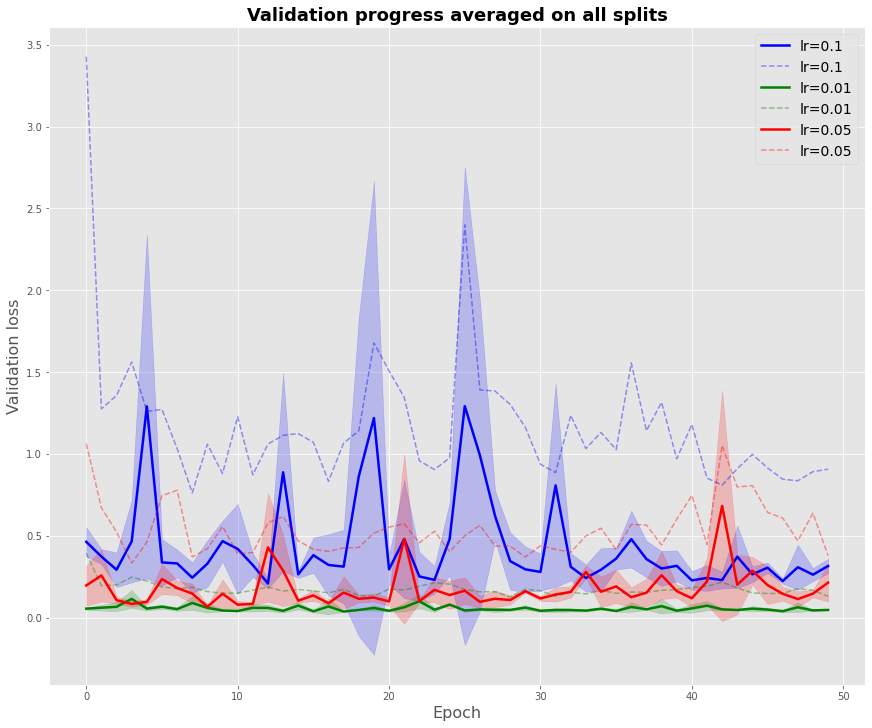

In [46]:
colours = ['blue', 'green', 'red']

plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Validation progress averaged on all splits", size=18, fontweight="bold")
for split, lr in enumerate(lrs):
    plt.plot(x_values, means_val_loss[split], "-", alpha=1.0, color=colours[split], label=f"lr={lr}", linewidth=2.5)
    plt.plot(x_values, means_train_loss[split], "--", alpha=0.4, color=colours[split], label=f"lr={lr}", linewidth=1.5)
    plt.fill_between(
        x_values,
        means_val_loss[split] - stds_val_loss[split],
        means_val_loss[split] + stds_val_loss[split],
        alpha=0.2,
        antialiased=True,
        color=colours[split]
    )

plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Validation loss", fontsize=16)
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/val_loss_all_splits.png')
plt.show()

## Validation Accuracy

In [33]:
lrs = [0.1, 0.01, 0.05]

means_val_acc = []
stds_val_acc = []

# lr=0.1
means_val_acc.append(np.array([dfs_lr_0_1[0].val_acc, 
                               dfs_lr_0_1[1].val_acc, 
                               dfs_lr_0_1[2].val_acc]).mean(axis=0))
stds_val_acc.append(np.array([dfs_lr_0_1[0].val_acc, 
                              dfs_lr_0_1[1].val_acc, 
                              dfs_lr_0_1[2].val_acc]).std(axis=0))
#lr=0.01
means_val_acc.append(np.array([dfs_lr_0_01[0].val_acc, 
                               dfs_lr_0_01[1].val_acc, 
                               dfs_lr_0_01[2].val_acc]).mean(axis=0))
stds_val_acc.append(np.array([dfs_lr_0_01[0].val_acc, 
                              dfs_lr_0_01[1].val_acc, 
                              dfs_lr_0_01[2].val_acc]).std(axis=0))
#lr=0.05
means_val_acc.append(np.array([dfs_lr_0_05[0].val_acc, 
                               dfs_lr_0_05[1].val_acc, 
                               dfs_lr_0_05[2].val_acc]).mean(axis=0))
stds_val_acc.append(np.array([dfs_lr_0_05[0].val_acc, 
                              dfs_lr_0_05[1].val_acc, 
                              dfs_lr_0_05[2].val_acc]).std(axis=0))

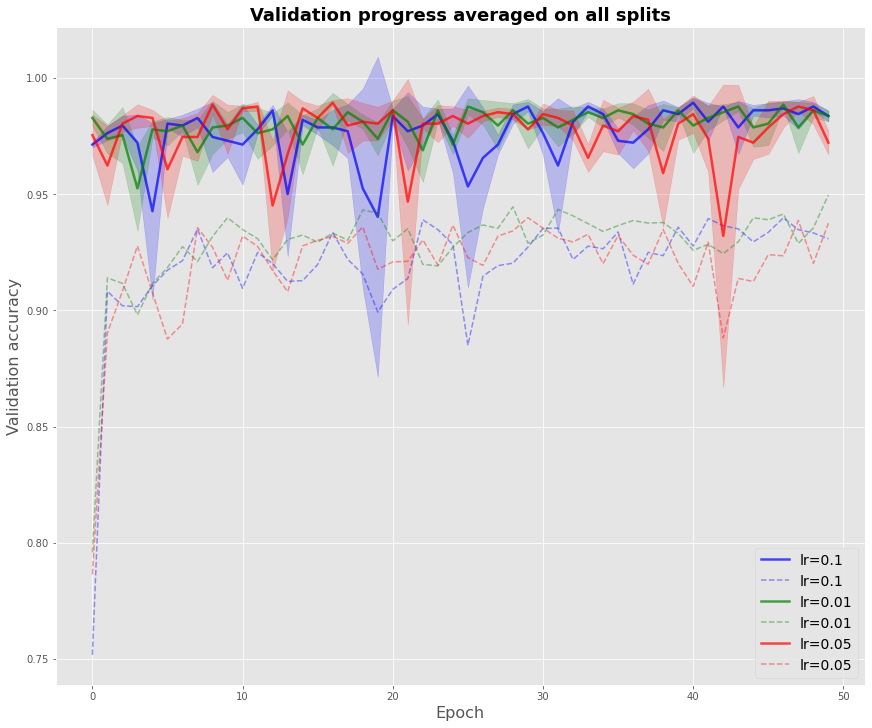

In [48]:
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Validation progress averaged on all splits", size=18, fontweight="bold")
for split, lr in enumerate(lrs):
    plt.plot(x_values, means_val_acc[split], "-", alpha=0.7, color=colours[split], label=f"lr={lr}", linewidth=2.5)
    plt.plot(x_values, means_train_acc[split], "--", alpha=0.4, color=colours[split], label=f"lr={lr}", linewidth=1.5)
    plt.fill_between(
        x_values,
        means_val_acc[split] - stds_val_acc[split],
        means_val_acc[split] + stds_val_acc[split],
        alpha=0.2,
        antialiased=True,
        color=colours[split]
    )

plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Validation accuracy", fontsize=16)
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/val_acc_all_splits.png')
plt.show()

## Full_splits

In [35]:
# Split 1
df_full_1 = pd.read_csv('output/resnet18/full_split_1/progress/train_progress.csv')
# Split 2
df_full_2 = pd.read_csv('output/resnet18/full_split_2/progress/train_progress.csv')
# Split 3
df_full_3 = pd.read_csv('output/resnet18/full_split_3/progress/train_progress.csv')

In [36]:
lr = 0.01
means_train_full_acc = np.array([df_full_1.train_acc, 
                               df_full_2.train_acc, 
                               df_full_3.train_acc]).mean(axis=0)
stds_train_full_acc = np.array([df_full_1.train_acc, 
                              df_full_2.train_acc, 
                              df_full_3.train_acc]).std(axis=0)

In [37]:
lr = 0.01
means_val_full_acc = np.array([df_full_1.val_acc, 
                               df_full_2.val_acc, 
                               df_full_3.val_acc]).mean(axis=0)
stds_val_full_acc = np.array([df_full_1.val_acc, 
                              df_full_2.val_acc, 
                              df_full_3.val_acc]).std(axis=0)

No handles with labels found to put in legend.


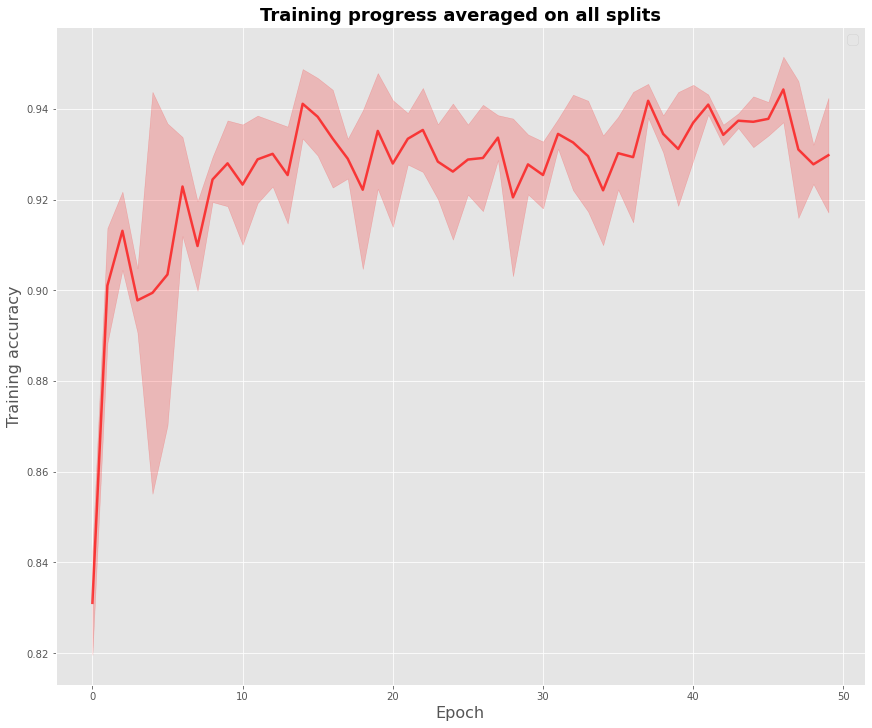

In [57]:
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Training progress averaged on all splits", size=18, fontweight="bold")
plt.plot(x_values, means_train_full_acc, "-", alpha=0.7, color="red", linewidth=2.5)
plt.fill_between(
    x_values,
    means_train_full_acc - stds_train_full_acc,
    means_train_full_acc + stds_train_full_acc,
    alpha=0.2,
    antialiased=True,
    color="red",
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Training accuracy", fontsize=16)
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/train_acc_all_full_splits.png')
plt.show()

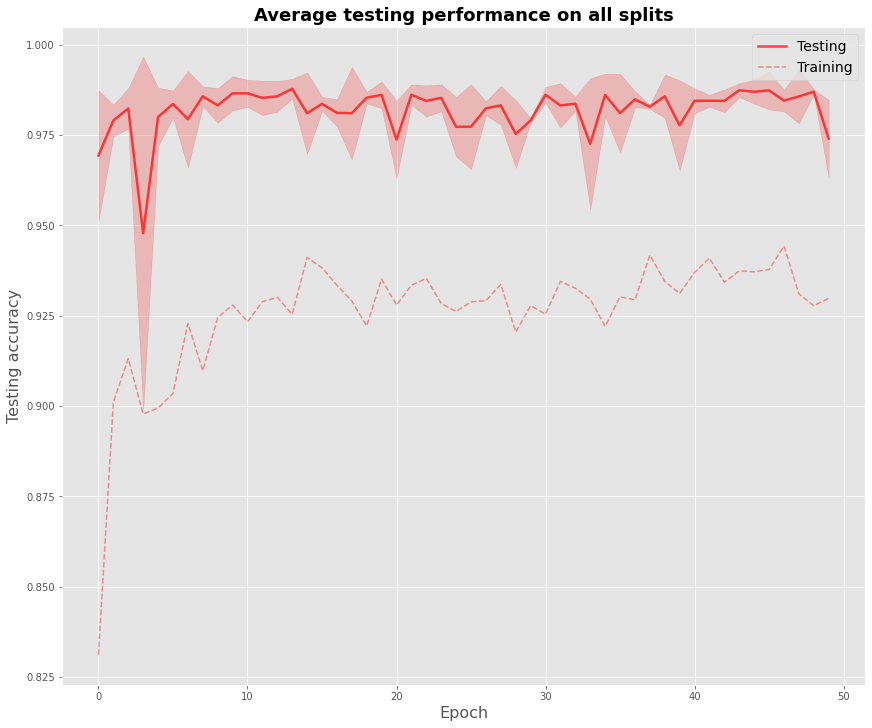

In [50]:
plt.figure(figsize=(12, 10))
axes = plt.gca()
plt.title(f"Average testing performance on all splits", size=18, fontweight="bold")
plt.plot(x_values, means_val_full_acc, "-", alpha=0.7, color="red", label="Testing", linewidth=2.5)
plt.plot(x_values, means_train_full_acc, "--", alpha=0.4, color="red", label="Training", linewidth=1.5)
plt.fill_between(
    x_values,
    means_val_full_acc - stds_val_full_acc,
    means_val_full_acc + stds_val_full_acc,
    alpha=0.2,
    antialiased=True,
    color="red"
)

plt.legend(loc="best", fontsize=14)
plt.xlabel("Epoch", fontsize=16)
plt.ylabel("Testing accuracy", fontsize=16)
plt.tight_layout(pad=0.3)
plt.savefig('figs/resnet18/test_acc_all_full_splits.png')
plt.show()